### Business Understanding

For this final notebook, we're trying to answer the following question: "Are remote workers generally more experienced developers?".

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('survey_results_public.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Understanding

Just like the last notebook, let us create a boolean `WorkRemote` column using the `HomeRemote` column. This way, we'll be able to split the survey's respondats into remote workers and non-remote workers.

In [82]:
fill_remote_boolean = lambda x: False if x == 'Never' else True

df.drop(df[df['HomeRemote'] == 'It\'s complicated'].index, inplace=True)
df.dropna(subset=['HomeRemote'], inplace=True)
df['WorkRemote'] = df['HomeRemote'].apply(fill_remote_boolean)

### Prepare Data

This time, since we're investigating the developers years of experience, let us create a new column entitled `YearsExperienceRange`. For this, we'll be using values from the `YearsProgram` column. 

First off, we'll restructure the `string` values into an `int` format, so that we're able to split the values via numeral comparisons.

Next, we'll create the `YearsExperienceRange` column. Since we don't want 20 differente categories, we'll divide the ranges into 6 possibilities:
- Less than one year of experience (0-1)
- 1 to 3 years of experience (1-3)
- 3 to 5 years of experience (3-5)
- 5 to 10 years of experience (5-10)
- 10 to 15 years of experience (10-15)
- 15 to 20 years of experience (15-20)

In [83]:
fill_years_program = lambda x: int(x) if type(x) == float else (0 if x == 'Less than a year' else int(x.split(' ')[0]))

df.dropna(subset=['YearsProgram'], inplace=True)
df['YearsProgram'] = df['YearsProgram'].apply(fill_years_program)
df['YearsExperienceRange'] = pd.cut(df['YearsProgram'], bins=[0, 1, 3, 5, 10, 15, 20], labels=['0-1', '1-3', '3-5', '5-10', '10-15', '15-20'])

### Evaluate the Results

Let us now evaluate the data through an horizontal bar plot for each of the workers' categories.

<AxesSubplot:title={'center':'Remote workers average salary by years of work experience (mean)'}, ylabel='YearsExperienceRange'>

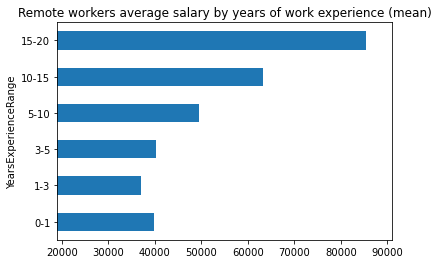

In [84]:
x_range = 1000
min_salary = 20000
max_salary = 90000
plt.xlim(min_salary - x_range, max_salary + x_range)

remote_sal = df[df['WorkRemote'] == True].groupby('YearsExperienceRange')['Salary'].mean()
remote_sal.plot(title='Remote workers average salary by years of work experience (mean)', kind="barh")

<AxesSubplot:title={'center':'Non-remote workers average salary by years of work experience (mean)'}, ylabel='YearsExperienceRange'>

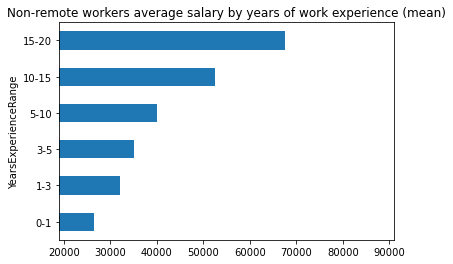

In [85]:
non_remote_sal = df[df['WorkRemote'] == False].groupby('YearsExperienceRange')['Salary'].mean()

plt.xlim(min_salary - x_range, max_salary + x_range)
non_remote_sal.plot(title='Non-remote workers average salary by years of work experience (mean)', kind="barh")

Observing the above graphs, our previous assumption (that remote workers are inclined to receive better income because they have more career experience) doesn't seem to be the case. Remote workers just tend to enjoy a higher salary, even if their work experience is equivalent to a developer who works exclusively from an office.

On all comparisons, developers who do remote work tend to make, on average, more than non-remote workers, even on their first year of experience.
